# Data Pipeline Outline:

0. Imports and Configurations
1. Import + Augment Training and Validation Data
2. Data Processing
3. Fit Model & Save Weights
4. Testing & Postprocessing (Graphs, Metrics, Output Examples, etc.)



# 0. Imports and Configurations

In [43]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from models.simpleConv import build_model
import matplotlib.pyplot as plt
%matplotlib inline


dataPath = 'RealImageNet/ImageNetSubsample/Data/CLS-LOC'
trainPath = os.path.join(dataPath, 'train')
testPath = os.path.join(dataPath, 'test')
validationPath = os.path.join(dataPath, 'val')

img_width, img_height = 224, 224

useGrayscale=False
if useGrayscale:
    color_mode='grayscale'
    num_channels=1
else:
    color_mode='rgb'
    num_channels=3
    
saveModel = True
modelName = "model1"
outputPath = os.path.join('output','saved-models')
if not os.path.isdir(outputPath):
    os.makedirs(outputPath)

# 1. Load Training and Validation Data


In [29]:

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   validation_split=0.1)


    
train_generator = train_datagen.flow_from_directory('RealImageNet/ImageNetSubsample/Data/CLS-LOC/train',
                                                   target_size=(img_width, img_height),
                                                   batch_size=16,
                                                   class_mode='categorical',
                                                   color_mode=color_mode,
                                                   subset='training')



val_generator = train_datagen.flow_from_directory('RealImageNet/ImageNetSubsample/Data/CLS-LOC/train',
                                                   target_size=(img_width, img_height),
                                                   batch_size=16,
                                                   class_mode='categorical',
                                                   color_mode='rgb',
                                                   subset='validation')





Found 5850 images belonging to 5 classes.
Found 650 images belonging to 5 classes.


# 2. Data Processing



# 3. Fit Model & Save Weights

In [35]:
# from keras.models import Sequential # How layers interact (x -> y)
# from keras.layers import Dense      # Type of layer (what you feed your data into)

model = build_model(img_width, img_height, num_channels)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

results = model.fit_generator(
        train_generator,
        validation_data=val_generator,
        steps_per_epoch=3,
        epochs=10)


if saveModel:
    model.save(os.path.join(ouputPath, modelName + '.h5'))

Epoch 1/10
3/3 [==============================] - 19s 6s/step - loss: 0.6868 - acc: 0.6417 - val_loss: 0.5076 - val_acc: 0.8000
Epoch 2/10
3/3 [==============================] - 18s 6s/step - loss: 0.5672 - acc: 0.8000 - val_loss: 0.5545 - val_acc: 0.8052
Epoch 3/10
3/3 [==============================] - 17s 6s/step - loss: 0.5069 - acc: 0.8000 - val_loss: 0.5192 - val_acc: 0.8000
Epoch 4/10
3/3 [==============================] - 17s 6s/step - loss: 0.4835 - acc: 0.7958 - val_loss: 0.4776 - val_acc: 0.7914
Epoch 5/10
3/3 [==============================] - 17s 6s/step - loss: 0.4889 - acc: 0.7833 - val_loss: 0.4278 - val_acc: 0.7972
Epoch 6/10
3/3 [==============================] - 17s 6s/step - loss: 0.4707 - acc: 0.7667 - val_loss: 0.4292 - val_acc: 0.8123
Epoch 7/10
3/3 [==============================] - 17s 6s/step - loss: 0.4377 - acc: 0.8042 - val_loss: 0.4114 - val_acc: 0.7942
Epoch 8/10
3/3 [==============================] - 17s 6s/step - loss: 0.4481 - acc: 0.7917 - val_loss: 0

# 4. Testing & Post-Processing (Metrics, Graphs, etc.)

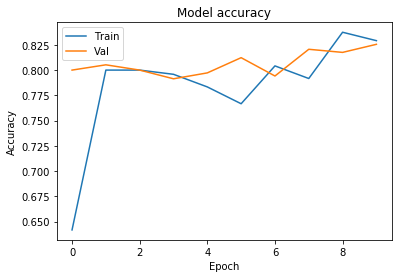

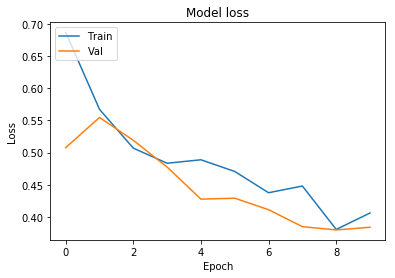

In [40]:


# Plot training & validation accuracy values
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()